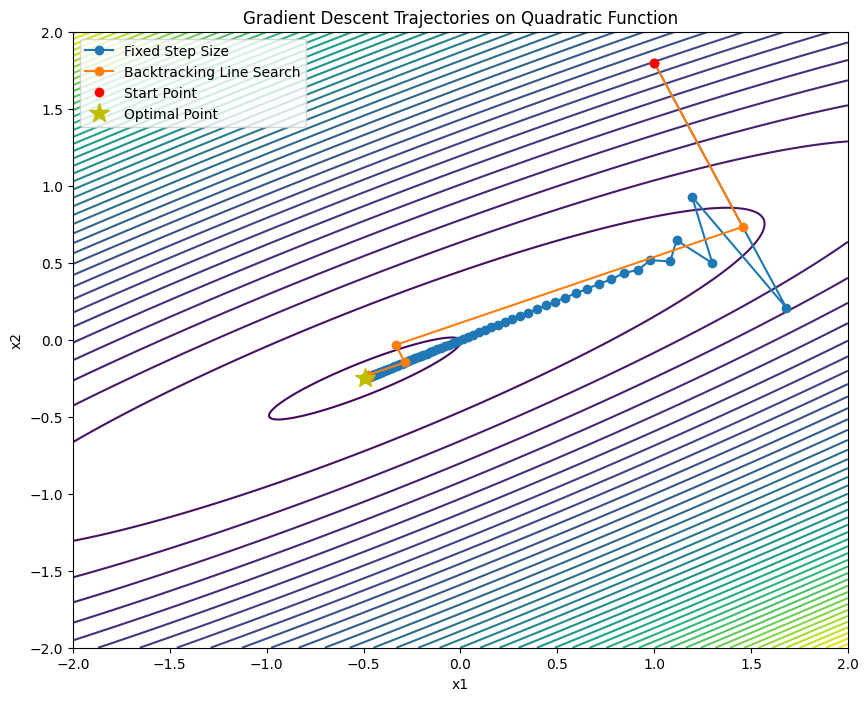

In [ ]:
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.optimize import minimize_scalar
    np.random.seed(214)

    # Define the quadratic function and its gradient
    def quadratic_function(x, A, b):
        return 0.5 * np.dot(x.T, np.dot(A, x)) - np.dot(b.T, x)

    def grad_quadratic(x, A, b):
        return np.dot(A, x) - b

    # Generate a 2D quadratic problem with a specified condition number
    def generate_quadratic_problem(cond_number):
        # Random symmetric matrix
        M = np.random.randn(2, 2)
        M = np.dot(M, M.T)

        # Ensure the matrix has the desired condition number
        U, s, V = np.linalg.svd(M)
        s = np.linspace(cond_number, 1, len(s))  # Spread the singular values
        A = np.dot(U, np.dot(np.diag(s), V))

        # Random b
        b = np.random.randn(2)

        return A, b

    # Gradient descent function
    def gradient_descent(start_point, A, b, stepsize_func, max_iter=100):
        x = start_point.copy()
        trajectory = [x.copy()]

        for i in range(max_iter):
            grad = grad_quadratic(x, A, b)
            step_size = stepsize_func(x, grad)
            x -= step_size * grad
            trajectory.append(x.copy())

        return np.array(trajectory)

    # Backtracking line search strategy using scipy
    def backtracking_line_search(x, grad, A, b, alpha=0.3, beta=0.8):
        def objective(t):
            return quadratic_function(x - t * grad, A, b)
        res = minimize_scalar(objective, method='golden')
        return res.x

    # Generate ill-posed problem
    cond_number = 30
    A, b = generate_quadratic_problem(cond_number)

    # Starting point
    start_point = np.array([1.0, 1.8])

    # Perform gradient descent with both strategies
    trajectory_fixed = gradient_descent(start_point, A, b, lambda x, g: 5e-2)
    trajectory_backtracking = gradient_descent(start_point, A, b, lambda x, g: backtracking_line_search(x, g, A, b))

    # Plot the trajectories on a contour plot
    x1, x2 = np.meshgrid(np.linspace(-2, 2, 400), np.linspace(-2, 2, 400))
    Z = np.array([quadratic_function(np.array([x, y]), A, b) for x, y in zip(x1.flatten(), x2.flatten())]).reshape(x1.shape)

    plt.figure(figsize=(10, 8))
    plt.contour(x1, x2, Z, levels=50, cmap='viridis')
    plt.plot(trajectory_fixed[:, 0], trajectory_fixed[:, 1], 'o-', label='Fixed Step Size')
    plt.plot(trajectory_backtracking[:, 0], trajectory_backtracking[:, 1], 'o-', label='Backtracking Line Search')

    # Add markers for start and optimal points
    plt.plot(start_point[0], start_point[1], 'ro', label='Start Point')
    optimal_point = np.linalg.solve(A, b)
    plt.plot(optimal_point[0], optimal_point[1], 'y*', markersize=15, label='Optimal Point')

    plt.legend()
    plt.title('Gradient Descent Trajectories on Quadratic Function')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.savefig("linesearch.svg")
    plt.show()